# Redes Neurais:

**Redes Neurais**, ou `Neural Network` (NN), são blocos construtores fundamentais do Deep Learning e são comumentes utilizados para realizar problemas em que a complexidade dos processamentos podem gerar um atraso nos calculos e acarretar numa tomada de decisão tardia. Para isso, as redes neurais são utilizadas com a finalidade de se obterem **resultados semi-otimos.**

O Deep Learning é uma das áreas do Machine Learning que utiliza da extração de padrões de dados com a finalidade de "aprender" determinado comportamento. O Machine Learning é definido como a capacidade da máquina de tomar decisões sem ser explicitamente programado. 

Comumente associamos essa capacidade de aprendizado do Deep Learning com a comunicação entre neurônios, em que utilizamos mais de um "neurônio" para a tomada de decisão.

<p align="center"><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/simple-nn.png" height="300px"></p>

Para **Python** , comumente utilizamos a biblioteca `tensorflow`, essa biblioteca possue diversos modulos disponíveis, mas iremos utilizar o `keras` em especifico para essa aula. O `keras` pode ser importado diretamente do `tensorflow`.

In [0]:
# Importando o tensorflow:
% tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

# Importando outras bibliotecas necessárias para manipulação de dados:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exemplo de Rede Neural: Sigmoid

A função Sigmoid é comumente utilizada como função de ativação de uma Rede Neural.

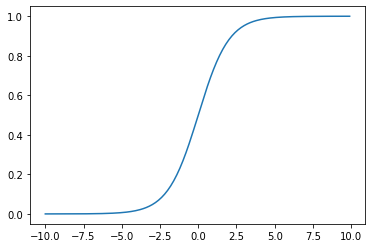

In [2]:
def sigmoid(x):
  return 1.0 / (1+np.exp(-x))

x = np.arange(-10, 10, 0.1)
y = sigmoid(x)

# Exemplo visual da Sigmoid:
plt.plot(x,y);

In [3]:
# Valores das Variáveis:
x1 = 10
x2 = -2

# Soma das Variáveis pelos pesos: w0 + X.W
res = 1 -2*x1 + 5*x2

# Função de ativação sigmoid
yhat = sigmoid(res)
print(yhat)

2.543665647376276e-13


# Elaborando a Neural Network (NN):

## Importando o Data Set:

In [0]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

dataset = fetch_california_housing()
features = dataset.feature_names

## Separando o modelo em Treino e Teste:

In [0]:
X_train_original, X_test, y_train_original, y_test = train_test_split(dataset.data, dataset.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_original, y_train_original)

In [6]:
df = pd.DataFrame(X_train)
df.columns = features
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.7731,34.0,5.837778,1.040000,1409.0,3.131111,33.78,-117.94
1,15.0001,52.0,9.867036,1.091413,1163.0,3.221607,34.07,-118.41
2,3.8529,17.0,4.916968,1.023466,2213.0,3.994585,32.58,-117.06
3,3.0625,14.0,5.486957,1.135652,951.0,1.653913,33.66,-117.99
4,4.0550,20.0,5.257951,1.102473,972.0,3.434629,33.83,-118.04


## Padronizando os dados:

In [0]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
X_valid = scale.transform(X_valid)

In [8]:
df = pd.DataFrame(X_train)
df.columns = features
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.477033,0.424937,0.191973,-0.133984,-0.024534,-0.002398,-0.855511,0.802093
1,5.874497,1.858730,2.020572,-0.008047,-0.232491,0.004161,-0.719609,0.567463
2,-0.008618,-0.929200,-0.225919,-0.174486,0.655129,0.060188,-1.417868,1.241402
3,-0.425764,-1.168166,0.032760,0.100319,-0.411706,-0.109467,-0.911747,0.777133
4,0.098044,-0.690235,-0.071170,0.019047,-0.393953,0.019602,-0.832080,0.752172


## Criando a NN:

In [0]:
model = keras.models.Sequential([keras.layers.Dense(30, activation = 'relu', input_shape = (X_train.shape[1:])),
                                keras.layers.Dense(1)])

## Compilando a NN:

In [0]:
model.compile(optimizer='sgd', loss='mean_squared_error')

## Obtendo o Histórico da NN:

In [11]:
history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_valid, y_valid))

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 1.1575 - val_loss: 0.5517
Epoch 2/50
363/363 [==============================] - 1s 1ms/step - loss: 0.5316 - val_loss: 0.4858
Epoch 3/50
363/363 [==============================] - 1s 1ms/step - loss: 0.4846 - val_loss: 0.4643
Epoch 4/50
363/363 [==============================] - 1s 1ms/step - loss: 0.4647 - val_loss: 0.4425
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4517 - val_loss: 0.4369
Epoch 6/50
363/363 [==============================] - 1s 1ms/step - loss: 0.4414 - val_loss: 0.4230
Epoch 7/50
363/363 [==============================] - 1s 1ms/step - loss: 0.4347 - val_loss: 0.4142
Epoch 8/50
363/363 [==============================] - 1s 1ms/step - loss: 0.4267 - val_loss: 0.4100
Epoch 9/50
363/363 [==============================] - 1s 1ms/step - loss: 0.4220 - val_loss: 0.4057
Epoch 10/50
363/363 [==============================] - 1s 1ms/step - loss: 0.4181 - val_loss: 0.3999

In [12]:
error = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 960us/step - loss: 0.3525


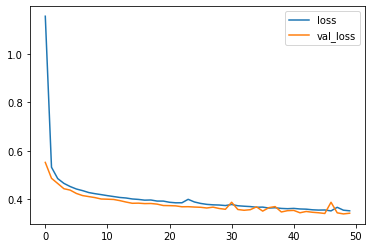

In [13]:
# plotar historico 
pd.DataFrame(history.history).plot();